In [1]:
import itertools
import numpy as np
import matplotlib as mpl
from sklearn.mixture import BayesianGaussianMixture
from collections import Counter
from scipy import linalg
import matplotlib.pyplot as plt
import contextlib   # context manager for printoptions later

In [2]:
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)

In [3]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [4]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [5]:
Y = np.genfromtxt('BGM_hypo4_data.csv', delimiter=',')
Y.shape
Y

array([[ 1.55292533e+00,  9.52582573e-01],
       [ 6.83918809e-01,  2.33833164e+00],
       [ 9.08432037e-01,  8.22728608e-01],
       [ 1.61946363e+00,  2.40458778e-01],
       [ 1.80253411e+00,  2.18346066e+00],
       [ 5.10468561e-01,  1.70796437e+00],
       [ 2.33335346e+00,  1.77405447e+00],
       [ 2.14158390e+00,  1.38125984e+00],
       [ 1.69578903e+00,  1.26595640e+00],
       [ 8.13224961e-01,  1.34666749e+00],
       [ 9.93113514e-01,  1.31376951e+00],
       [ 1.39791441e+00,  1.31063362e+00],
       [ 1.12628117e+00,  5.86690234e-01],
       [ 1.31238372e+00,  1.47379505e+00],
       [ 6.23153923e-01,  1.41473304e+00],
       [ 1.44979976e+00,  1.56051372e+00],
       [ 1.65024287e+00,  1.16320743e+00],
       [ 1.71123966e+00,  2.03152339e+00],
       [ 1.62971841e+00,  8.74848936e-01],
       [ 1.08371871e+00,  1.36766815e+00],
       [ 1.23738335e+00,  1.19158144e+00],
       [ 1.38182126e+00,  1.60491083e+00],
       [ 1.52898590e+00,  1.10070437e+00],
       [ 1.

([1, 2, 3, 4], [1, 2, 3, 4])

In [6]:
random_seed = 27132
n_components = 10
rng = np.random.RandomState(seed = random_seed) 

In [7]:
DProc = BayesianGaussianMixture(n_components=n_components,
  weight_concentration_prior_type="dirichlet_process",
  weight_concentration_prior=1e-1,
  n_init = 7,
  init_params='kmeans',      # default 'kmeans'
  random_state=random_seed   # if int, then taken as random seed
  ).fit(Y)   # random_state=random_state

In [8]:
results = DProc.predict(Y)
probs = DProc.predict_proba(Y)
res_prob = np.column_stack((probs, results))

In [9]:
    print(results)
    print("\nposterior prob:\n", probs)
    print("\nmean:\n", DProc.means_)
    print("\ncovariances\n", DProc.covariances_)
    print("\nweights", DProc.weights_)
    print("\nCount the clusters\n")
    print( Counter(results).keys() )     # equals to list(set(words))
    print( Counter(results).values() )   # count freq of the elements

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0]

posterior prob:
 [[5.05623908e-03 1.22973609e-04 9.94816233e-01 ... 9.07720421e-18
  4.12104434e-22 1.87095123e-26]
 [2.51016890e-02 3.58573290e-04 9.74537906e-01 ... 2.66785931e-17
  1.21120625e-21 5.49886787e-26]
 [4.05947336e-02 3.81410789e-04 9.58953369e-01 ... 2.80245001e-17
  1.27231034e-21 5.77628000e-26]
 ...
 [9.99884816e-01 1.14611283e-04 2.41356633e-17 ... 8.17406789e-18
  3.71102108e-22 1.68480096e-26]
 [9.93689886e-01 3.02858550e-04 6.11981369e-09 ... 2.17566799e-17
  9.87751741e-22 4.48438597

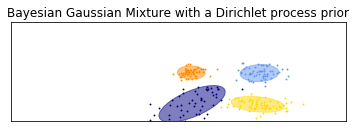

In [10]:
plot_results(Y, DProc.predict(Y), DProc.means_, DProc.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')
plt.show()